In [48]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx

In [39]:
df = pd.read_csv('dataset/heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [40]:
df.shape

(1025, 14)

In [41]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [42]:
model = BayesianNetwork(
    [('age','target'),
    ('sex','cp'),
    ('cp','target'),
    ('trestbps','target'),
    ('chol','target')]
)

In [43]:
model.fit(data=df, estimator=MaximumLikelihoodEstimator)

In [44]:
model.nodes

NodeView(('age', 'target', 'sex', 'cp', 'trestbps', 'chol'))

In [45]:
heartdiseasinfer = VariableElimination(model)

In [46]:
q1 = heartdiseasinfer.query(variables=['target'], evidence={'age':70})
print(q1)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5002 |
+-----------+---------------+
| target(1) |        0.4998 |
+-----------+---------------+


In [47]:
q1 = heartdiseasinfer.query(variables=['target'], evidence={'cp':3})
print(q1)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4999 |
+-----------+---------------+
| target(1) |        0.5001 |
+-----------+---------------+


In [49]:
graph = nx.DiGraph()
graph.add_edges_from(model.edges())

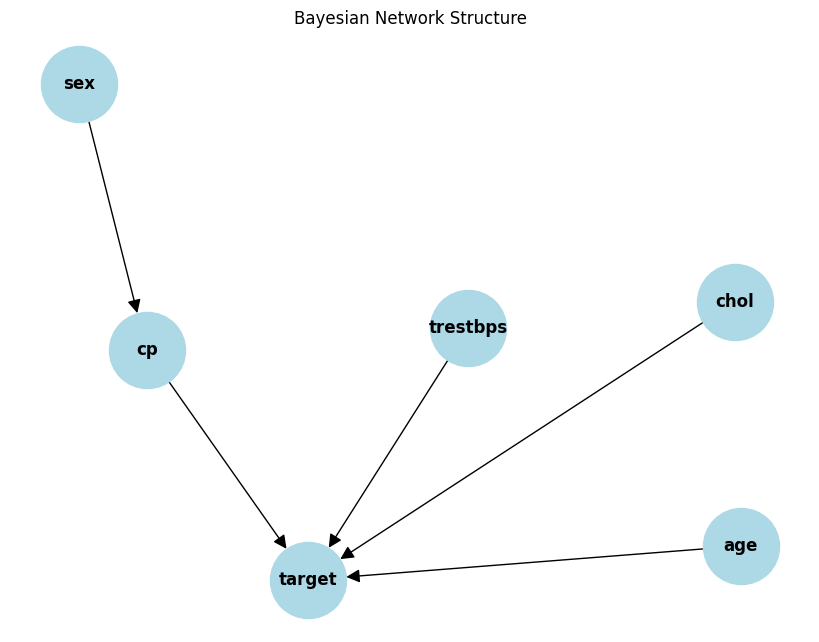

In [50]:
plt.figure(figsize=(8, 6))
nx.draw(graph, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', arrowsize=20)
plt.title("Bayesian Network Structure")
plt.show()